In [48]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
import sys

# number of nodes and edges
NODES = 50
EDGES = 100

In [49]:
# creates a list of random edges along with their weights
edges  = []
for i in range(EDGES):
    while True:
        source = random.randint(1, NODES)
        target = random.randint(1, NODES)
        if source != target:
            break
    
    weight = random.randint(50, 100)
    edges.append((source, target, weight))

In [50]:
# creates a directed graph

G = nx.DiGraph()
G.add_nodes_from(range(1, NODES))
G.add_weighted_edges_from(edges)

In [51]:
# create a dictionary with edge as value and weight as key

weights = {}
for edge in G.edges:
    weights[edge] = G.get_edge_data(edge[0], edge[1])['weight']

In [52]:
# Selecting a random source and target
source = 0
target = 0
while source == target:
    source = random.randint(1, NODES)
    target = random.randint(1, NODES)

print('Source:', source)
print('Target:', target)

Source: 20
Target: 24


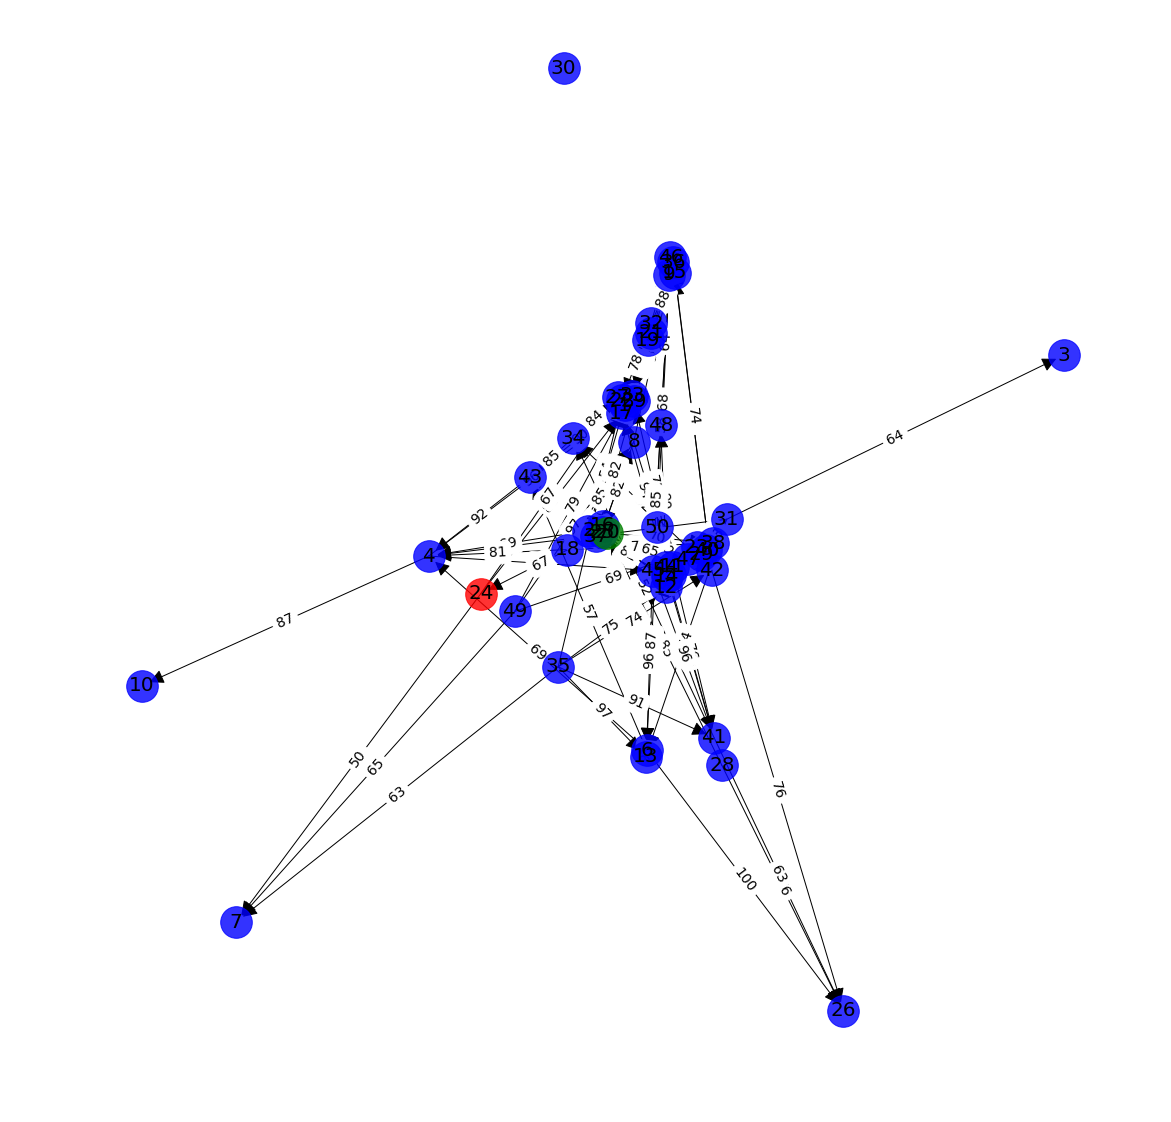

In [58]:
plt.figure(figsize=(20, 20))
pos = nx.spring_layout(G)

# draw nodes with labels
nodelist = list(range(1, NODES+1))
nodelist.remove(source)
nodelist.remove(target)

nx.draw_networkx_nodes(G, pos, nodelist, node_color='b', node_size=1000, alpha=0.8)
nx.draw_networkx_nodes(G, pos, nodelist = [source], node_color='g', node_size=1000, alpha=0.8)
nx.draw_networkx_nodes(G, pos, nodelist = [target], node_color='r', node_size=1000, alpha=0.8)
nx.draw_networkx_labels(G, pos, font_size=20)

# draw edges with weight as labels
nx.draw_networkx_edges(G, pos, arrowstyle='-|>', arrowsize=30)
nx.draw_networkx_edge_labels(G, pos, edge_labels=weights, font_size=14)

plt.axis('off')
plt.show()

In [59]:
# Min Heap Functions
key = {}
parent = {}

def build_min_heap(A):
    heap_size = len(A)
    for i in range(heap_size // 2, -1, -1):
        min_heapify(A, heap_size, i)

def min_heapify(A, heap_size, i):
    l = 2*i + 1
    r = (2*i) + 2
    
    smallest = None
    if l < heap_size and A[l][1] < A[i][1]:
        smallest = l
    else:
        smallest = i
    
    if r < heap_size and A[r][1] < A[smallest][1]:
        smallest = r
    
    if smallest != i:
        A[i], A[smallest] = A[smallest], A[i]
        min_heapify(A, heap_size, smallest)

def extract_min(A, vertices):
    heap_size = len(A)
    
    if heap_size < 0:
        print("heap underlfow")
    
    minimum = A[0]
    A[0] = A[heap_size - 1]
    heap_size -= heap_size
  
    min_heapify(A, heap_size, 0)
    try:
        vertices.remove(minimum[0])
    except ValueError:
        pass
    
    return minimum

In [60]:
# Dijkstra Functions

def relax(u, v, w):
    if key[v] > key[u[0]] + w:
        key[v] = key[u[0]] + w
        parent[v] = u[0]

def initialize_single_source(G, s):
    for vertex in G.nodes():
        key[vertex] = sys.maxsize
        parent[vertex] = None
        key[s] = 0

def dijkstra(G, source):
    initialize_single_source(G, source)
    S = []
    q = list(zip(key.keys(), key.values()))
    build_min_heap(q)
    vertices = list(key.keys())
    
    while len(vertices) != 0:
        u = extract_min(q, vertices)
        S.append(u)
        
        for v in G.adj[u[0]]:
            relax(u, v, G[u[0]][v]['weight'])
            
        weights = []
        for v in vertices:
            weights.append(key[v])
        
        q = list(zip(vertices, weights))
        build_min_heap(q)

In [61]:
dijkstra(G, source)
print('Parent Set', parent)
print('Key Set', key)

Parent Set {1: 17, 2: 37, 3: 31, 4: 18, 5: 23, 6: 50, 7: 24, 8: 25, 9: 50, 10: 4, 11: 8, 12: None, 13: 31, 14: None, 15: 9, 16: 20, 17: 24, 18: 8, 19: None, 20: None, 21: None, 22: None, 23: 29, 24: 25, 25: 16, 26: 41, 27: 24, 28: None, 29: 40, 30: None, 31: 23, 32: None, 33: 27, 34: 41, 35: None, 36: 8, 37: 39, 38: 25, 39: 11, 40: 38, 41: 11, 42: 2, 43: 34, 44: None, 45: 4, 46: 36, 47: None, 48: None, 49: None, 50: 11}
Key Set {1: 420, 20: 0, 2: 570, 3: 595, 4: 432, 5: 538, 6: 491, 7: 301, 8: 266, 9: 472, 10: 519, 11: 334, 12: 9223372036854775807, 13: 585, 14: 9223372036854775807, 15: 539, 16: 90, 17: 337, 18: 351, 19: 9223372036854775807, 21: 9223372036854775807, 22: 9223372036854775807, 23: 440, 24: 251, 25: 184, 26: 466, 27: 318, 28: 9223372036854775807, 29: 382, 30: 9223372036854775807, 31: 531, 32: 9223372036854775807, 33: 369, 34: 455, 35: 9223372036854775807, 36: 362, 37: 487, 38: 254, 39: 405, 40: 308, 41: 403, 42: 667, 43: 540, 44: 9223372036854775807, 45: 489, 46: 457, 47: 9

In [63]:
node = target
edgelist = []
while node != source:
    edge = (parent[node], node)
    node = parent[node]
    edgelist.append(edge)

print(edgelist)

[(25, 24), (16, 25), (20, 16)]


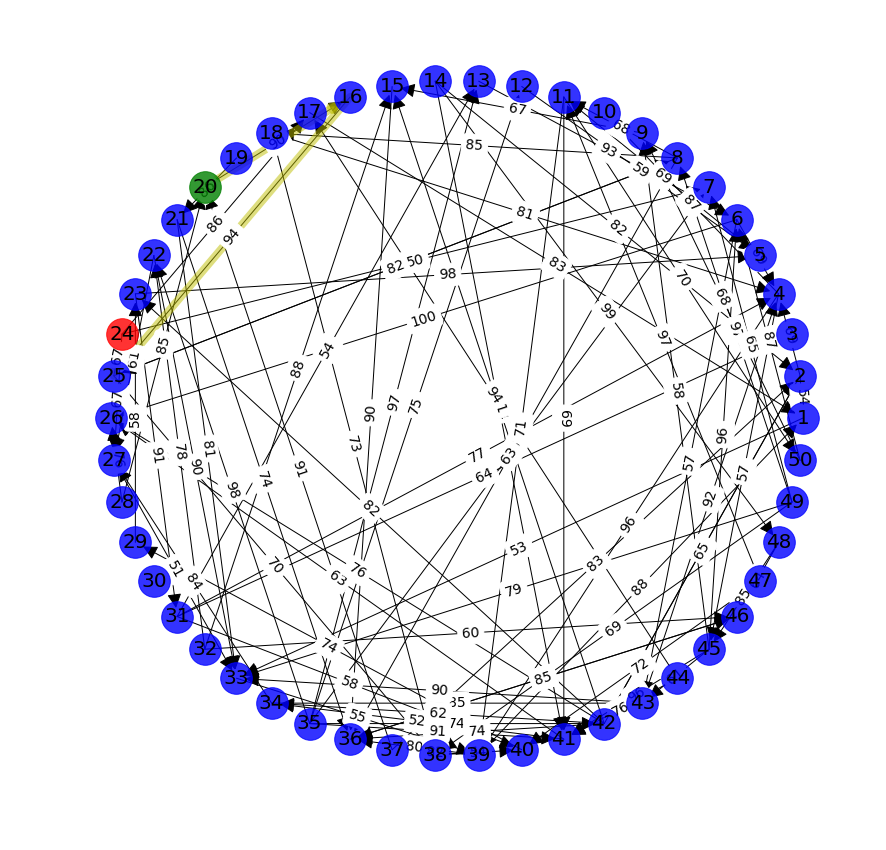

In [66]:
plt.figure(figsize=(15, 15))
pos = nx.shell_layout(G)

# draw nodes with labels
nodelist = list(range(1, NODES+1))
nodelist.remove(source)
nodelist.remove(target)

nx.draw_networkx_nodes(G, pos, nodelist, node_color='b', node_size=1000, alpha=0.8)
nx.draw_networkx_nodes(G, pos, nodelist = [source], node_color='g', node_size=1000, alpha=0.8)
nx.draw_networkx_nodes(G, pos, nodelist = [target], node_color='r', node_size=1000, alpha=0.8)
nx.draw_networkx_labels(G, pos, font_size=20)

# draw edges with weight as labels
nx.draw_networkx_edges(G, pos, arrowstyle='-|>', arrowsize=30)
nx.draw_networkx_edges(G, pos, edgelist=edgelist, width=8, alpha=0.5, edge_color='y')
nx.draw_networkx_edge_labels(G, pos, edge_labels=weights, font_size=14)


plt.axis('off')
plt.show()